In [ ]:
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input

In [6]:
with open('AccidentsSeparatedByMonths.json', 'r') as file:
    data = json.load(file)

dates = list(data.keys())
values = list(data.values())

date_indices = np.arange(len(dates)).reshape(-1, 1)
values = np.array(values).reshape(-1, 1)

In [7]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()
date_indices_scaled = scaler_x.fit_transform(date_indices)
values_scaled = scaler_y.fit_transform(values)

In [12]:
model = tf.keras.Sequential([
    Input(shape=[1]), 
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mean_squared_error')

In [21]:
model.fit(date_indices_scaled, values_scaled, epochs=10000, verbose=0)
predictions_scaled = model.predict(date_indices_scaled)
predictions = scaler_y.inverse_transform(predictions_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


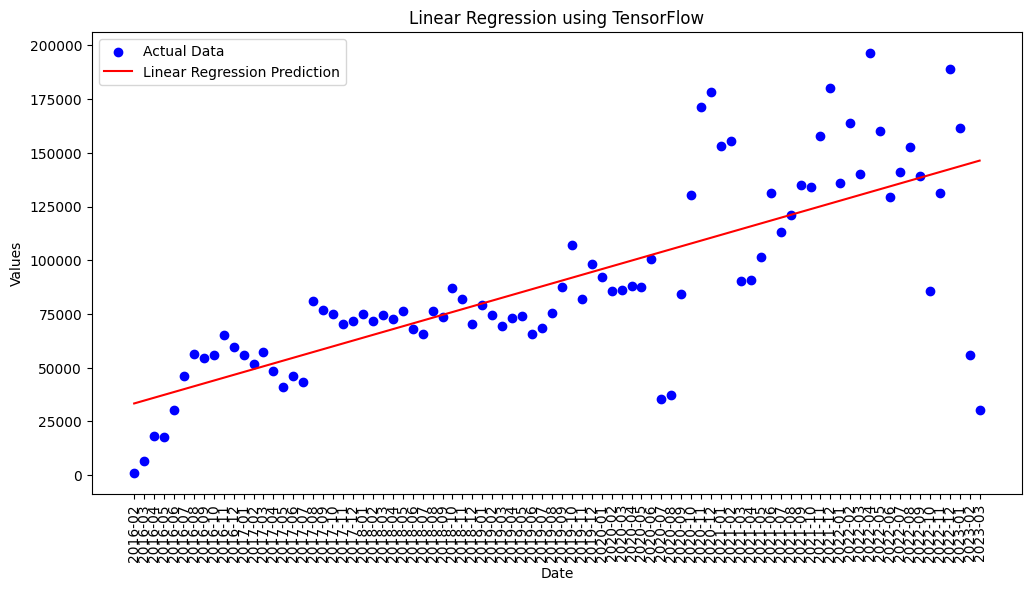

In [22]:
plt.figure(figsize=(12, 6))
plt.scatter(dates, values, label='Actual Data', color='blue')
plt.plot(dates, predictions, label='Linear Regression Prediction', color='red')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.title('Linear Regression using TensorFlow')
plt.show()

In [32]:
weights, bias = model.layers[0].get_weights()

slope = float(weights[0][0])
offset = float(bias[0])

output_data = {
    "dates": dates,
    "actual_values": values.flatten().tolist(), 
    "predicted_values": predictions.flatten().tolist(),
    "slope": slope,
    "offset": offset
}

with open('predictions_data.json', 'w') as f:
    json.dump(output_data, f, indent=4)

print(f"Slope: {slope}")
print(f"Offset: {offset}")

Slope: 0.7567428350448608
Offset: -0.0007129270816221833
